In [1]:
%load_ext autoreload

In [2]:
%autoreload 1

In [3]:
import glob
import numpy as np
from rich.pretty import pprint
import matplotlib.pyplot as plt
import matplotlib
import hist
from hist import Hist
import mplhep as hep
import ROOT
import iminuit
import iminuit.cost
import iminuit.util

Welcome to JupyROOT 6.26/04


In [4]:
%aimport fit_utils
%aimport barlow_beeston

In [5]:
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'
plt.style.use(hep.style.CMS)
#np.set_printoptions(suppress=True, precision=3)

In [6]:
plots_CR_cb = fit_utils.loader('CR_cb')
plots_CR_prompt = fit_utils.loader('CR_prompt')
plots_SR = fit_utils.loader('SR')

KeyError: 'av_muon_pt'

In [ ]:
processes = [
    #'VVV_2018',
    #'ttZJets_2018',
    #'WJets_all_2018',
    #'ST_2018',
    'VV_2018',
    'TTJets_2018',
    'DY_NLO_all_2018',
    'QCD_Pt_MuEnriched_2018',
]
k_factor_names_dict = {
    'VVV_2018': 'k_VVV',
    'ttZJets_2018': 'k_ttZ',
    'WJets_all_2018': 'k_WJets',
    'ST_2018': 'k_ST',
    'VV_2018': 'k_VV',
    'TTJets_2018': 'k_TT',
    'DY_NLO_all_2018': 'k_DY',
    'QCD_Pt_MuEnriched_2018': 'k_QCD',
}
k_factor_names_list = [k_factor_names_dict[p] for p in processes]

In [8]:
templates_prompt = []
templates_cb = []
templates_SR = []
for nMuon in range(8):
    _, temp_prompt = fit_utils.prepare_histograms(
        plots_CR_prompt, processes, nMuon=nMuon, count_mode=True
    )
    _, temp_cb = fit_utils.prepare_histograms(
        plots_CR_cb, processes, nMuon=nMuon, count_mode=True
    )
    _, temp_SR = fit_utils.prepare_histograms(
        plots_SR, processes, nMuon=nMuon, count_mode=True, blind=True
    )
    templates_prompt.append(temp_prompt)
    templates_cb.append(temp_cb)
    templates_SR.append(temp_SR)

In [9]:
k_factors = [1.409, 1.092, 0.884, 0.721] 
ek_factors = [0.09, 0.036, 0.013, 0.006]
S_decay, eS_decay = 1.60, 0.06

In [10]:
print(
    "[nMuons x processes x (ndf, df)] : [", 
    len(templates_prompt), 'x', 
    len(templates_prompt[0]), 'x', 
    len(templates_prompt[0][0]), "]"
)

[nMuons x processes x (ndf, df)] : [ 8 x 4 x 2 ]


In [11]:
hists_nMuon_data_prompt = plots_CR_prompt[
    "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018"
]["ht"].project("nMuon")
hists_nMuon_prefit_prompt = [Hist.new.Reg(8, 0, 8, name=f"nMuon").Weight() for p in processes]
hists_nMuon_postfit_prompt = [Hist.new.Reg(8, 0, 8, name=f"nMuon").Weight() for p in processes]

hists_nMuon_data_cb = plots_CR_cb[
    "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018"
]["ht"].project("nMuon")
hists_nMuon_prefit_cb = [Hist.new.Reg(8, 0, 8, name=f"nMuon").Weight() for p in processes]
hists_nMuon_postfit_cb = [Hist.new.Reg(8, 0, 8, name=f"nMuon").Weight() for p in processes]

hists_nMuon_data_SR = plots_SR[
    "DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018"
]["ht"].project("nMuon").reset()
hists_nMuon_prefit_SR = [Hist.new.Reg(8, 0, 8, name=f"nMuon").Weight() for p in processes]
hists_nMuon_postfit_SR = [Hist.new.Reg(8, 0, 8, name=f"nMuon").Weight() for p in processes]

In [12]:
prefit_prompt = [
    [
        templates_prompt[r][p][0].sum() + templates_prompt[r][p][1].sum() for p in range(len(processes))
    ] for r in range(len(templates_prompt))
]
prefit_cb = [
    [
        templates_cb[r][p][0].sum() + templates_cb[r][p][1].sum() for p in range(len(processes))
    ] for r in range(len(templates_cb))
]
prefit_SR = [
    [
        templates_SR[r][p][0].sum() + templates_SR[r][p][1].sum() for p in range(len(processes))
    ] for r in range(len(templates_SR))
]

In [13]:
pprint(prefit_SR)

[
│   [
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0, variance=0)
│   ],
│   [
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0, variance=0)
│   ],
│   [
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0, variance=0)
│   ],
│   [
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0, variance=0)
│   ],
│   [
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0, variance=0)
│   ],
│   [
│   │   WeightedSum(value=0.00409903, variance=3.28982e-08),
│   │   WeightedSum(value=0.536492, variance=0.00524991),
│   │   WeightedSum(value=-0.13236, variance=0.00350382),
│   │   WeightedSum(value=274.975, variance=2269.95)
│   ],
│   [
│   │   WeightedSum(value=4.64041e-05, variance=3.5889e-10),
│   │   WeightedSum(value=0.0257516, variance=0.000552622),
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=2.04937, variance=0.61796)
│   ],
│   [
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0, variance=0),
│   │   WeightedSum(value=0.391101, variance=0.0218111)
│   ]
]

In [14]:
df_part_scaled_prompt = [
    [
        (
            S_decay*templates_prompt[r][p][1][:, 1j] + 
            (S_decay**2)*templates_prompt[r][p][1][:, 2j] + 
            (S_decay**3)*templates_prompt[r][p][1][:, 3j] + 
            (S_decay**4)*templates_prompt[r][p][1][:, 4j]
        ) for p in range(len(processes))
    ] for r in range(len(templates_prompt))
]
postfit_prompt = [
    [
        (
            k_factors[p] * ( templates_prompt[r][p][0] + df_part_scaled_prompt[r][p] )
        ).sum() for p in range(len(processes))
    ] for r in range(len(templates_prompt))
]

df_part_scaled_cb = [
    [
        (
            S_decay*templates_cb[r][p][1][:, 1j] + 
            (S_decay**2)*templates_cb[r][p][1][:, 2j] + 
            (S_decay**3)*templates_cb[r][p][1][:, 3j] + 
            (S_decay**4)*templates_cb[r][p][1][:, 4j]
        ) for p in range(len(processes))
    ] for r in range(len(templates_cb))
]
postfit_cb = [
    [
        (
            k_factors[p] * ( templates_cb[r][p][0] + df_part_scaled_cb[r][p] )
        ).sum() for p in range(len(processes))
    ] for r in range(len(templates_cb))
]

df_part_scaled_SR = [
    [
        (
            (S_decay**1)*templates_SR[r][p][1][:, 1j] + 
            (S_decay**2)*templates_SR[r][p][1][:, 2j] + 
            (S_decay**3)*templates_SR[r][p][1][:, 3j] + 
            (S_decay**4)*templates_SR[r][p][1][:, 4j] + 
            (S_decay**5)*templates_SR[r][p][1][:, 5j] + 
            (S_decay**6)*templates_SR[r][p][1][:, 6j] + 
            (S_decay**7)*templates_SR[r][p][1][:, 7j]
        ) for p in range(len(processes))
    ] for r in range(len(templates_SR))
]
postfit_SR = [
    [
        (
            k_factors[p] * ( templates_SR[r][p][0] + df_part_scaled_SR[r][p] )
        ).sum() for p in range(len(processes))
    ] for r in range(len(templates_SR))
]

In [15]:
for nMuon in range(8):
    for i_p, p in enumerate(processes):
        divide_factor = nMuon
        if nMuon == 0:
            divide_factor = 1
        hists_nMuon_prefit_prompt[i_p][nMuon] = (
            prefit_prompt[nMuon][i_p].value / divide_factor, prefit_prompt[nMuon][i_p].variance / divide_factor
        )
        hists_nMuon_postfit_prompt[i_p][nMuon] = (
            postfit_prompt[nMuon][i_p].value / divide_factor, postfit_prompt[nMuon][i_p].variance / divide_factor
        )
        hists_nMuon_prefit_cb[i_p][nMuon] = (
            prefit_cb[nMuon][i_p].value / divide_factor, prefit_cb[nMuon][i_p].variance / divide_factor
        )
        hists_nMuon_postfit_cb[i_p][nMuon] = (
            postfit_cb[nMuon][i_p].value / divide_factor, postfit_cb[nMuon][i_p].variance / divide_factor
        )
        hists_nMuon_prefit_SR[i_p][nMuon] = (
            prefit_SR[nMuon][i_p].value / divide_factor, prefit_SR[nMuon][i_p].variance / divide_factor
        )
        hists_nMuon_postfit_SR[i_p][nMuon] = (
            postfit_SR[nMuon][i_p].value / divide_factor, postfit_SR[nMuon][i_p].variance / divide_factor
        )

In [16]:
pprint(hists_nMuon_prefit_prompt)
pprint(hists_nMuon_data_prompt)

[
│   Hist(Regular(8, 0, 8, name='nMuon'), storage=Weight()) # Sum: WeightedSum(value=150.9, variance=0.122449),
│   Hist(Regular(8, 0, 8, name='nMuon'), storage=Weight()) # Sum: WeightedSum(value=1589.24, variance=19.9745),
│   Hist(Regular(8, 0, 8, name='nMuon'), storage=Weight()) # Sum: WeightedSum(value=4495.8, variance=575.262),
│   Hist(Regular(8, 0, 8, name='nMuon'), storage=Weight()) # Sum: WeightedSum(value=95906, variance=1.23798e+06)
]

Hist(Regular(8, 0, 8, name='nMuon'), storage=Weight()) # Sum: WeightedSum(value=93792, variance=93792)

In [17]:
def plot_stack_ratio(data, templates):
    fig = plt.figure(figsize=(10, 10))
    plt.subplots_adjust(bottom=0.15, left=0.17)
    ax1 = plt.subplot2grid((4, 1), (0, 0), rowspan=3)
    ax2 = plt.subplot2grid((4, 1), (3, 0), sharex=ax1)

    # Plot the bkg stack
    hep.histplot(
        templates,
        label=[p.replace("_2018", "") for p in processes],
        stack=True,
        histtype="fill",
        ec="black",
        lw=2,
        ax=ax1,
        zorder=1,
    )

    # Plot the unc hatch for bkg stack
    hist_bkg_total = templates[0].copy().reset()
    for p in range(len(processes)):
        hist_bkg_total += templates[p]
    x_hatch = np.vstack(
        (hist_bkg_total.axes[0].edges[:-1], hist_bkg_total.axes[0].edges[1:])
    ).reshape((-1,), order="F")
    y_hatch1 = np.vstack((hist_bkg_total.values(), hist_bkg_total.values())).reshape(
        (-1,), order="F"
    )
    y_hatch1_unc = np.vstack(
        (np.sqrt(hist_bkg_total.variances()), np.sqrt(hist_bkg_total.variances()))
    ).reshape((-1,), order="F")
    ax1.fill_between(
        x=x_hatch,
        y1=y_hatch1 - y_hatch1_unc,
        y2=y_hatch1 + y_hatch1_unc,
        label="Stat. Unc.",
        step="pre",
        facecolor="none",
        edgecolor=(0, 0, 0, 0.5),
        linewidth=0,
        hatch="///",
        zorder=2,
    )
    hep.histplot(
        data,
        label=["Data"],
        histtype="errorbar",
        mec="black",
        mfc="black",
        ecolor="black",
        ax=ax1,
    )
    plt.setp(ax1.get_xticklabels(), visible=False)
    hep.cms.label(llabel="Preliminary", data=False, lumi=0.57, ax=ax1)
    ax1.set_xlabel("")
    maximum_value = max(np.max(data.values()), np.max(hist_bkg_total.values()))
    accuracy = 10**(np.floor(np.log10(maximum_value)))
    ax1.set_ylim(0.0, accuracy * round((1.35 * maximum_value) / accuracy) )
    ax1.set_ylim(0.1, 1e8)
    if np.isclose(data.sum().value, 0):
        ax1.set_ylim(0.01, 1e5)
    ax1.legend(ncol=2, loc='best')
    ax1.set_yscale("log")

    # Calculate and plot the ratio
    ratio = np.divide(
        data.values(),
        hist_bkg_total.values(),
        out=np.ones_like(data.values()),
        where=hist_bkg_total.values() != 0,
    )
    ratio_err = np.where(
        hist_bkg_total.values() > 0,
        np.sqrt(
            (hist_bkg_total.values() ** -2) * (data.variances())
            + (data.values() ** 2 * hist_bkg_total.values() ** -4)
            * (hist_bkg_total.variances())
        ),
        0,
    )
    ax2.errorbar(
        data.axes.centers[0],
        ratio,
        yerr=ratio_err,
        color="black",
        fmt="o",
        linestyle="none",
    )

    # Draw a filled hatch area with the relative uncertainty of the MC in the ratio plot.
    mc_rel_unc = np.divide(
        np.sqrt(hist_bkg_total.variances()),
        hist_bkg_total.values(),
        out=np.zeros_like(hist_bkg_total.values()),
        where=hist_bkg_total.values() != 0,
    )
    y_hatch2 = np.vstack(
        (np.ones_like(hist_bkg_total.values()), np.ones_like(hist_bkg_total.values()))
    ).reshape((-1,), order="F")
    y_hatch2_unc = np.vstack((mc_rel_unc, mc_rel_unc)).reshape((-1,), order="F")
    ax2.fill_between(
        x=x_hatch,
        y1=y_hatch2 - y_hatch2_unc,
        y2=y_hatch2 + y_hatch2_unc,
        step="pre",
        facecolor="none",
        edgecolor=(0, 0, 0, 0.5),
        linewidth=0,
        hatch="///",
    )

    ax2.axhline(1, ls="--", color="gray")
    ax2.set_xlabel("nMuon")
    ax2.set_ylabel("Ratio")
    ax2.set_ylim(0.5, 1.5)
    if np.isclose(data.sum().value, 0):
        ax2.set_ylim(0.0, 2.0)
    return

/tmp/ipykernel_16265/1997992855.py:75: RuntimeWarning: divide by zero encountered in power
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_16265/1997992855.py:75: RuntimeWarning: invalid value encountered in multiply
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_16265/1997992855.py:76: RuntimeWarning: divide by zero encountered in power
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)
/tmp/ipykernel_16265/1997992855.py:76: RuntimeWarning: invalid value encountered in multiply
  + (data.values() ** 2 * hist_bkg_total.values() ** -4)
/tmp/ipykernel_16265/1997992855.py:75: RuntimeWarning: divide by zero encountered in power
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_16265/1997992855.py:75: RuntimeWarning: invalid value encountered in multiply
  (hist_bkg_total.values() ** -2) * (data.variances())
/tmp/ipykernel_16265/1997992855.py:76: RuntimeWarning: divide by zero encountered in power
  + (data.values() ** 2

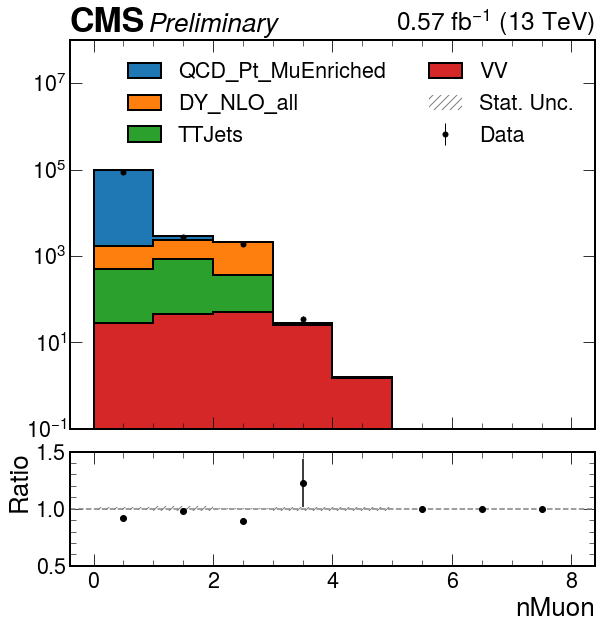

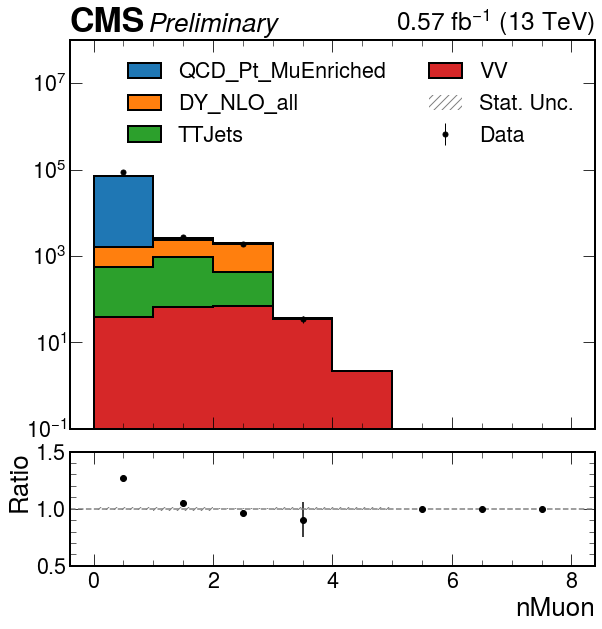

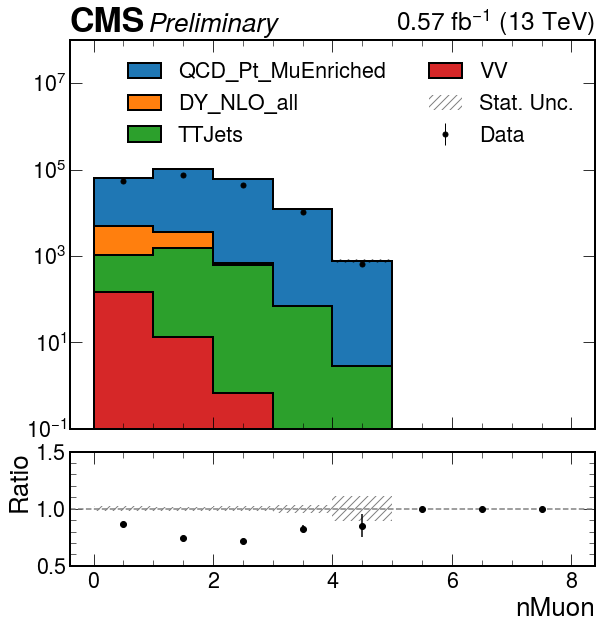

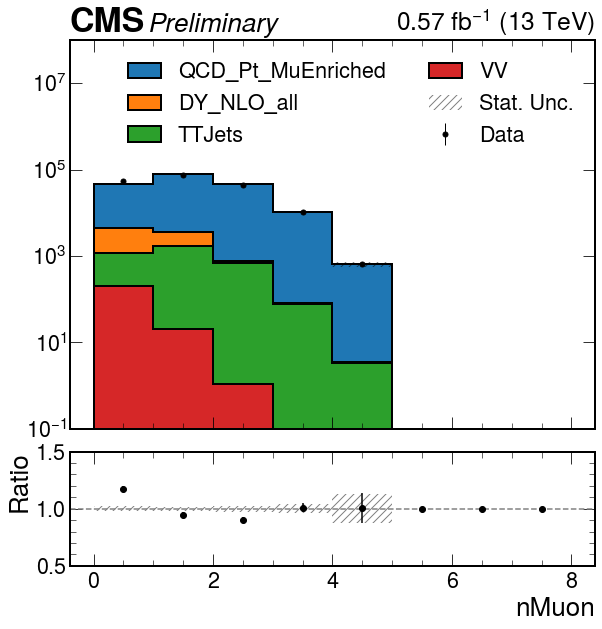

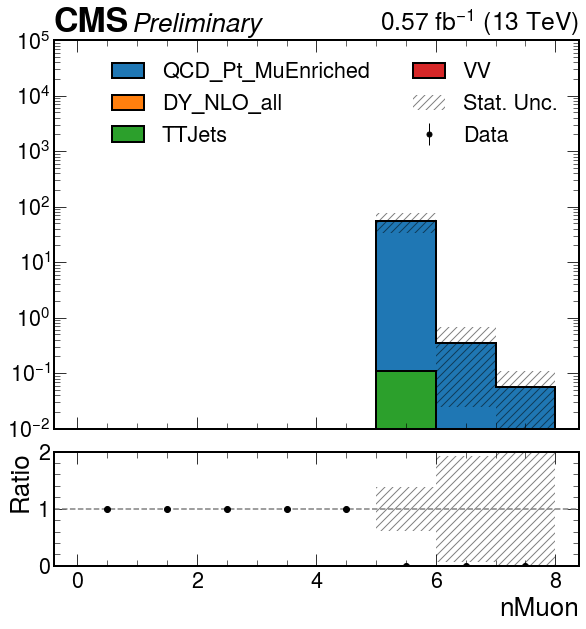

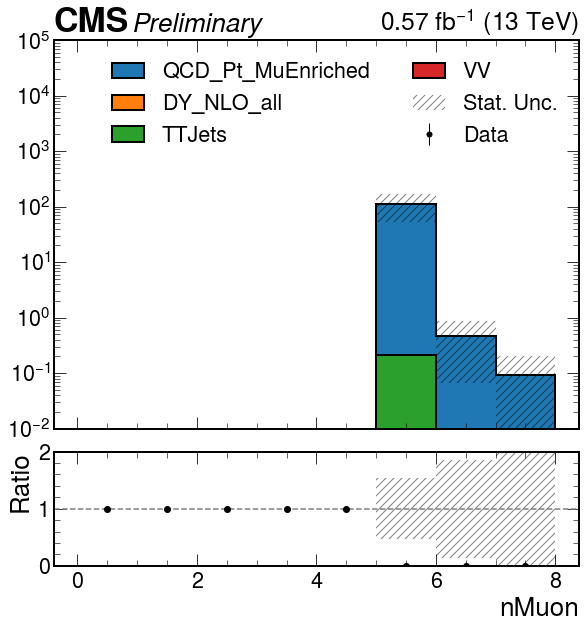

In [18]:
plot_stack_ratio(hists_nMuon_data_prompt, hists_nMuon_prefit_prompt)
plot_stack_ratio(hists_nMuon_data_prompt, hists_nMuon_postfit_prompt)
plot_stack_ratio(hists_nMuon_data_cb, hists_nMuon_prefit_cb)
plot_stack_ratio(hists_nMuon_data_cb, hists_nMuon_postfit_cb)
plot_stack_ratio(hists_nMuon_data_SR, hists_nMuon_prefit_SR)
plot_stack_ratio(hists_nMuon_data_SR, hists_nMuon_postfit_SR)

In [23]:
# For the total SR bkg:
np.set_printoptions(suppress=True, precision=4)
print('vals: ', sum(hists_nMuon_postfit_SR).values())
print('vars: ', sum(hists_nMuon_postfit_SR).variances())
print('uncs: ', np.sqrt(sum(hists_nMuon_postfit_SR).variances()))
print('rel. unc.', np.sqrt(sum(hists_nMuon_postfit_SR).variances())/sum(hists_nMuon_postfit_SR).values())

vals:  [  0.       0.       0.       0.       0.     111.8356   0.4647   0.0941]
vars:  [   0.        0.        0.        0.        0.     3509.9858    0.1585
    0.0126]
uncs:  [ 0.      0.      0.      0.      0.     59.2451  0.3982  0.1121]
rel. unc. [   nan    nan    nan    nan    nan 0.5298 0.8569 1.1913]


/tmp/ipykernel_16265/1493348762.py:6: RuntimeWarning: invalid value encountered in true_divide
  print('rel. unc.', np.sqrt(sum(hists_nMuon_postfit_SR).variances())/sum(hists_nMuon_postfit_SR).values())


In [20]:
# adding up the nMuon >= 6
print('vals: ', sum(sum(hists_nMuon_postfit_SR).values()[-2:]))
print('uncs: ', np.sqrt(sum(sum(hists_nMuon_postfit_SR).variances()[-2:])))
print('rel. unc.', np.sqrt(sum(sum(hists_nMuon_postfit_SR).variances()[-2:]))/sum(sum(hists_nMuon_postfit_SR).values()[-2:]))

vals:  0.5587844528378864
uncs:  0.41366711986452986
rel. unc. 0.7402981914826866


In [25]:
# For the total SR bkg:
np.set_printoptions(suppress=True, precision=4)
print('vals: ', sum(hists_nMuon_postfit_SR).values())
print('vars: ', sum(hists_nMuon_postfit_SR).variances())
print('uncs: ', np.sqrt(sum(hists_nMuon_postfit_SR).variances()))
print('rel. unc.', np.sqrt(sum(hists_nMuon_postfit_SR).variances())/sum(hists_nMuon_postfit_SR).values())
print("adding up the nMuon >= 6")
print('\tvals: ', sum(sum(hists_nMuon_postfit_SR).values()[-2:]))
print('\tuncs: ', np.sqrt(sum(sum(hists_nMuon_postfit_SR).variances()[-2:])))
print(
    '\trel. unc.', 
    np.sqrt(sum(sum(hists_nMuon_postfit_SR).variances()[-2:]))/sum(sum(hists_nMuon_postfit_SR).values()[-2:])
)

vals:  [  0.       0.       0.       0.       0.     111.8356   0.4647   0.0941]
vars:  [   0.        0.        0.        0.        0.     3509.9858    0.1585
    0.0126]
uncs:  [ 0.      0.      0.      0.      0.     59.2451  0.3982  0.1121]
rel. unc. [   nan    nan    nan    nan    nan 0.5298 0.8569 1.1913]
adding up the nMuon >= 6
	vals:  0.5587844528378864
	uncs:  0.41366711986452986
	rel. unc. 0.7402981914826866


/tmp/ipykernel_16265/3441558552.py:6: RuntimeWarning: invalid value encountered in true_divide
  print('rel. unc.', np.sqrt(sum(hists_nMuon_postfit_SR).variances())/sum(hists_nMuon_postfit_SR).values())


vals:  0.5587844528378864
uncs:  0.41366711986452986
rel. unc. 0.7402981914826866


In [21]:
# Which prefit templates are empty???
np.set_printoptions(suppress=True, precision=10)
for i_h, h in enumerate(hists_nMuon_prefit_SR):
    print(processes[i_h], np.isclose(h.values(), 0))

VV_2018 [ True  True  True  True  True False False  True]
TTJets_2018 [ True  True  True  True  True False False  True]
DY_NLO_all_2018 [ True  True  True  True  True False  True  True]
QCD_Pt_MuEnriched_2018 [ True  True  True  True  True False False False]


In [26]:
def punzi(B, a=2, b=5):
    return a**2/8 + 9*b**2/13 + a*np.sqrt(B) + (b/2)*np.sqrt(b**2 + 4*a*np.sqrt(B) + 4*B)

/tmp/ipykernel_16265/2435601447.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(B, eff, np.ones([100,100]) * eff[:,np.newaxis]/punzi(B))


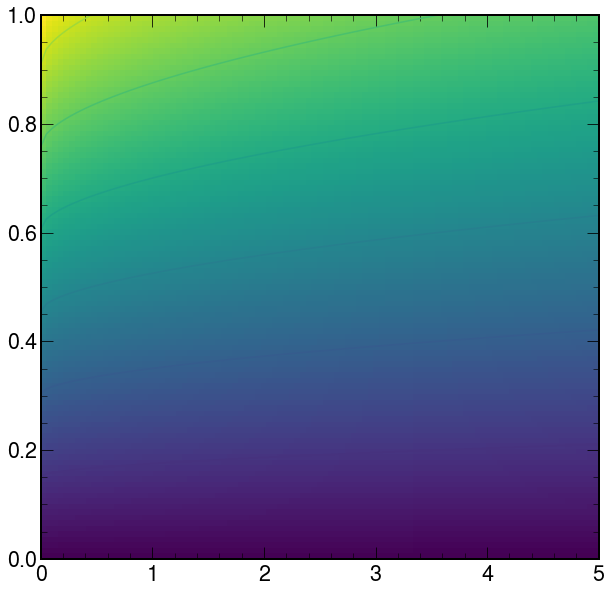

In [60]:
B = np.linspace(0,5,100)
eff = np.linspace(0,1,100)
plt.pcolormesh(B, eff, np.ones([100,100]) * eff[:,np.newaxis]/punzi(B))
plt.contour(B, eff, np.ones([100,100]) * eff[:,np.newaxis]/punzi(B))

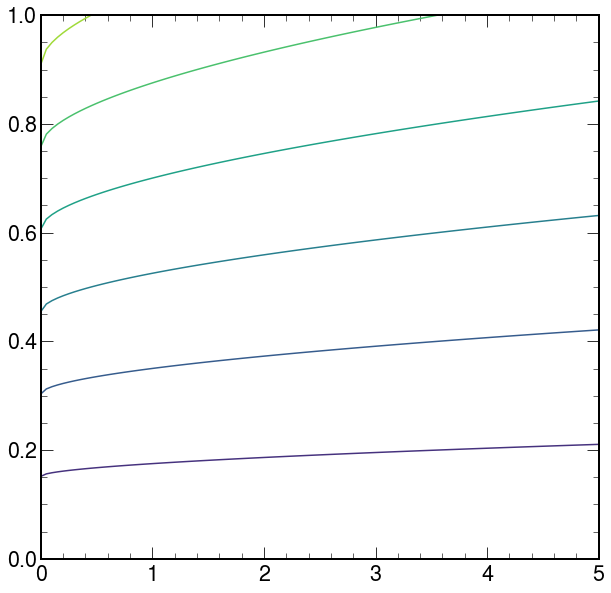

In [53]:
1/punzi(B)

array([0.033 , 0.0281, 0.0262, 0.0248, 0.0237])

In [54]:
np.ones([5,5]) * eff[:,np.newaxis]

array([[0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25, 0.25],
       [0.5 , 0.5 , 0.5 , 0.5 , 0.5 ],
       [0.75, 0.75, 0.75, 0.75, 0.75],
       [1.  , 1.  , 1.  , 1.  , 1.  ]])

In [55]:
np.ones([5,5]) * eff[:,np.newaxis]/punzi(B)

array([[0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.0082, 0.007 , 0.0065, 0.0062, 0.0059],
       [0.0165, 0.014 , 0.0131, 0.0124, 0.0119],
       [0.0247, 0.021 , 0.0196, 0.0186, 0.0178],
       [0.033 , 0.0281, 0.0262, 0.0248, 0.0237]])